#  SENTIMENT ANALYSIS FOR KENYA AIRWAYS

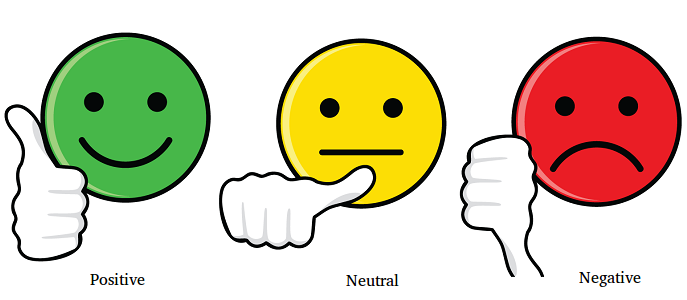

###  AUTHORS

* Winfred Kinya Bundi
* Jeremiah Waiguru
* Paul Ngatia
* Mercy Kiragu

##  1.0  PROJECT OVERVIEW

This project is focused on analyzing customer reviews of Kenya Airways to extract meaningful insights regarding customer satisfaction and service quality. By utilizing sentiment analysis techniques, the project will classify these reviews into positive, negative, or neutral sentiments. The goal is to help Kenya Airways identify areas of excellence as well as aspects of their service that may require improvement. This analysis will serve as a foundation for enhancing customer experience and driving operational improvements.

##  1.1  BUSINESS UNDERSTANDING

In the competitive aviation industry, customer satisfaction plays a vital role in shaping the reputation and success of an airline. Kenya Airways, like many airlines, receives numerous reviews from passengers, which contain valuable feedback about their experiences. Understanding the sentiments behind these reviews is essential for identifying strengths and weaknesses in service delivery. This project will leverage sentiment analysis to process and analyze customer feedback, enabling Kenya Airways to make informed decisions that enhance passenger satisfaction and loyalty.

##  1.2  PROBLEM STATEMENT

Kenya Airways is challenged by the vast amount of unstructured customer feedback available through online reviews. Without an efficient method to analyze this feedback, the airline may overlook critical insights that could lead to service improvements. This project aims to address this challenge by systematically analyzing the sentiment of customer reviews, providing Kenya Airways with a clear understanding of customer perceptions and identifying key areas that require attention.

##  1.3  OBJECTIVES

### Primary objective

To develop a robust sentiment analysis model that accurately classifies customer reviews of Kenya Airways into positive, negative, or neutral sentiments.

###  Specific objectives

1. To explore the sentiment distribution across different customer demographics, travel classes, and time periods.
2. To identify recurring themes and specific aspects of service (e.g., customer service, punctuality, in-flight experience) that are frequently mentioned in the reviews.
3. To assess the performance of various sentiment analysis models and determine the most effective model for this dataset.
4. To generate actionable insights from the sentiment analysis that can be used by Kenya Airways to improve customer service and address common issues

##  2.0  DATA UNDERSTANDING

We did Web Scraping from the 3 websites below and merged our datasets

1. https://uk.trustpilot.com/review/www.kenya-airways.com
2. https://www.airlinequality.com/airline-reviews/kenya-airways/
3. https://www.airlineratings.com/airlines/kenya-airways

The dataset has 3065 rows and 5 columns with the following description ;

* Departures: This column indicates the departure region or type of flight, such as "Africa" or "International."
* Class: This column specifies the class of travel, such as "Economy" or "Business Class."
* Review: This column contains customer reviews of their experiences with Kenya Airways. The text data may include opinions, complaints, and compliments about the airline.
* Rating: This column contains the numeric rating provided by the customer, typically ranging from 1.0 to 5.0, where 1.0 represents "Poor" and 5.0 represents "Excellent."
* Rating_description: This column provides a textual description corresponding to the numeric rating, such as "Poor," "Good," or "Excellent."

## Importing Necessary Libraries

In [72]:
# importing libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px 

import string
import joblib
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud 
from sklearn.metrics import roc_curve, auc

#downloading dependencies

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-dat

## 2. 1 Loading Datasets

### 1.Dataset one

In [73]:
#Kenya_airways_flights
df1= pd.read_csv('Refined data/Dataset_one.csv')
df1.sample(1000)

,Date3,Departures,Class,Review,Rating_Value,Rating_Description
1132,2018-08-01,Africa,Economy,When I booked the flight I specifically looked...,2.0,Poor
1245,2018-08-01,Africa,Economy,"As always, KQ has let me down, the flights are...",2.0,Poor
399,2019-09-01,Africa,Business Class,The flight was on time as scheduled. The staff...,5.0,Excellent
1062,2018-09-01,Africa,Economy,I was continuing my overnight journey from Lon...,3.0,Average
303,2019-12-01,Africa,Economy,Absolutely horrible service and with it scarre...,1.0,Poor
...,...,...,...,...,...,...
2334,2016-01-01,International,Economy,This was the first time I had flown with Kenya...,4.0,Good
461,2019-08-01,International,Economy,Seats were not very comfortable. Leg space as ...,3.0,Average
1042,2018-11-01,Africa,Economy,After new CEO this airline change for the bett...,3.0,Average
1386,2018-03-01,International,Economy,There was a four hour delay and they promised ...,1.0,Poor


In [74]:
def describe_columns(df1):
    # Print column names
    print("Column Names:")
    print(df1.columns)

    # Print number of rows and columns
    print("\nShape:")
    print(df1.shape)

describe_columns(df1)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating_Value',
       'Rating_Description'],
      dtype='object')

Shape:
(2345, 6)


The Dataset has 2345 rows and 6 columns.
The other columns are categorical or text-based.

### 2.Dataset two

In [75]:
#Kenya_airways_reviews
df2= pd.read_csv('Refined data/Dataset_two.csv')
df2.head()

,Date3,Review
0,2024-02-24,✅ Trip Verified | I have never seen such a dis...
1,2024-02-24,Not Verified | Bumped off flight at boarding...
2,2024-07-30,✅ Trip Verified | I am disappointment with t...
3,2024-07-25,✅ Trip Verified | This airline is becoming mo...
4,2024-07-24,✅ Trip Verified | 3 out of 4 flights delayed ...


In [76]:
def describe_columns(df2):
    # Print column names
    print("Column Names:")
    print(df2.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df2.shape)

describe_columns(df2)

Column Names:
Index(['Date3', 'Review'], dtype='object')

Shape:
(477, 2)


The Dataset has 477 rows and 2 columns.

### 3.Dataset three

In [77]:
# KQ_reviews
df3= pd.read_csv('Refined data/Dataset_three.csv')
df3.head()

,Date3,Rating,Review
0,02-08-2024,0.0,Constantly canceling flights Kenya airlines ca...
1,04-08-2024,0.0,Kenya Airways canceled the flight and… Kenya A...
2,30-07-2024,0.0,If your thinking of Kenya Airlines...think aga...
3,29-07-2024,0.0,"Worst airlines ever Worst airlines ever, not f..."
4,25-07-2024,0.0,We were trying to go to Nampula from Nairobi a...


In [78]:
def describe_columns(df3):
    # Print column names
    print("Column Names:")
    print(df3.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df3.shape)

describe_columns(df3)

Column Names:
Index(['Date3', 'Rating', 'Review'], dtype='object')

Shape:
(243, 3)


The Dataset has 243 rows and 3 columns.Mainly, 'Date', 'Rating and 'Review'

## Loading the Merged Dataset

In [79]:
# KQ_Data
df = pd.read_csv('Refined data/KQ_Data.csv')
df

,Date3,Departures,Class,Review,Rating,Rating_Description
0,2022-09-01 00:00:00,Africa,Economy,Recently I travelled for business from Cape To...,4.0,Good
1,2022-11-01 00:00:00,International,Economy,I want to thanks to Jane for her excellent ser...,5.0,Excellent
2,2022-05-01 00:00:00,International,Economy,not a bad airline to fly with could do with a ...,4.0,Good
3,2022-11-01 00:00:00,Africa,Business Class,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0,Poor
4,2022-11-01 00:00:00,Africa,Economy,"Absolutely appalling airline, never ever use i...",1.0,Poor
...,...,...,...,...,...,...
3060,26-01-2017,NaN,NaN,Better than I expected Much better service tha...,0.0,NaN
3061,30-08-2016,NaN,NaN,Request for immediate action. I have never had...,0.0,NaN
3062,02-07-2016,NaN,NaN,Never again Flew with Kenya airways last year ...,0.0,NaN
3063,21-11-2015,NaN,NaN,NEVER AGAIN - RUBISH COMPANY !!! We travelled ...,1.0,NaN


In [80]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

Data Types:
Date3                  object
Departures             object
Class                  object
Review                 object
Rating                float64
Rating_Description     object
dtype: object

Shape:
(3065, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date3               3063 non-null   object 
 1   Departures          2345 non-null   object 
 2   Class               2345 non-null   object 
 3   Review              3065 non-null   object 
 4   Rating              2578 non-null   float64
 5   Rating_Description  2345 non-null   object 
dtypes: float64(1), object(5)
memory usage: 143.8+ KB
None

Descriptive Statistics:
            Rating
count  2578.000000
mean      2.865012
std 

The dataset has 3065 rows and 6 columns. It also has missing values, with some columns registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the Review column needs preprocessing since it contains raw text with numbers, nametags,emojis and punctuations.

## 3.0 DATA PREPARATION

### 3.1  Data Cleaning

Steps to start cleaning the data:

*  Focus on the columns or attributes that are relevant for your analysis or purposes.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

In [81]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print("Missing values in each column:")
print(missing_values)

# Check the percentage of missing values in each column (optional)
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Missing values in each column:
Date3                   2
Departures            720
Class                 720
Review                  0
Rating                487
Rating_Description    720
dtype: int64

Percentage of missing values in each column:
Date3                  0.065253
Departures            23.491028
Class                 23.491028
Review                 0.000000
Rating                15.889070
Rating_Description    23.491028
dtype: float64


Overall Insights:
* High Missing Data: Columns Departures, Class, and Rating_Description have a significant amount of missing data (23.49%). 
* Depending on the analysis, we have the option to either impute these values, drop the rows/columns, or find another way to handle them.(Use placeholders)
* Moderate Missing Data: The Rating column has a moderate level of missing values (15.89%), which could influence the analysis if not addressed.
* Low Missing Data: The Date3 column has very few missing values (0.07%), making it easier to handle.

###  dealing with missing values
For the columns: (Departures, Class, Date3, and Rating_Description) we will replace them with placeholders so as to retain them since they can be helpful in analysis. For the Rating column however, we will fill missing values with the median of that column.

In [82]:
df = pd.read_csv('Refined data/KQ_Data.csv')

# Replace missing values with placeholders
# Specify the placeholder for each column or use a general placeholder for all missing values

df['Date3'].fillna('Missing Date', inplace=True)
df['Departures'].fillna('Unknown', inplace=True)
df['Class'].fillna('Unknown', inplace=True)
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Rating_Description'].fillna('Poor', inplace=True)

# Check the result
df.sample(200)


,Date3,Departures,Class,Review,Rating,Rating_Description
124,2021-08-01 00:00:00,Africa,Economy,On 26 of august I flow from Uganda to Kenya wi...,1.0,Poor
1901,2017-05-01 00:00:00,Africa,Economy,For a full flight the service was fine. The le...,4.0,Good
845,2019-01-01 00:00:00,International,Economy,This was my first time flying Kenyan Air the c...,4.0,Good
639,2019-07-01 00:00:00,International,Economy,"Not a bad airline , the service was great and ...",4.0,Good
1915,2017-05-01 00:00:00,International,Economy,Flew out of Heathrow on the Boeing Dream Liner...,3.0,Average
...,...,...,...,...,...,...
129,2020-09-01 00:00:00,International,Economy,Kenya airways is the worst experience I ve eve...,1.0,Poor
394,2019-07-01 00:00:00,International,Economy,This is the worst airline that we have been on...,1.0,Poor
2254,2016-03-01 00:00:00,Southeast Asia,Economy,This is probably the cheapest ticket we can ge...,4.0,Good
1971,2017-02-01 00:00:00,International,Business Class,The headphones weren't working so my husband a...,3.0,Average


In [83]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values

Date3                 0
Departures            0
Class                 0
Review                0
Rating                0
Rating_Description    0
dtype: int64

Our Dataset is now okay and does not contain any Missing data

## Data Preprocessing

#### Feature selection

In [84]:
df.columns

Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

In [85]:
KQ_df = df[['Rating_Description', 'Review','Rating']]
KQ_df.head(10)

,Rating_Description,Review,Rating
0,Good,Recently I travelled for business from Cape To...,4.0
1,Excellent,I want to thanks to Jane for her excellent ser...,5.0
2,Good,not a bad airline to fly with could do with a ...,4.0
3,Poor,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0
4,Poor,"Absolutely appalling airline, never ever use i...",1.0
5,Excellent,We flew from Heathrow to Nairobi on our way to...,5.0
6,Poor,Was travling from Kenya to South Africa last w...,1.0
7,Good,"After reading the reviews on here, I was prepa...",4.0
8,Poor,"Kenya Airways is very disorganzied, first of a...",1.0
9,Poor,I travelled to London on July 10th ON KQ100 wi...,1.0


From our data overview, the Review column contains raw text with unwanted characters, numbers,whitespaces, punctuations and also nametags which will need to be parsed.

In [86]:
# Remove special characters, unwanted characters, unnecessary phrases
def remove_special_characters(text):
    text = re.sub(r'\r\n|\n', ' ', text)
    return text

def remove_extra_whitespace(text):
    text = ' '.join(text.split())
    return text

def convert_to_lowercase(text):
    text = text.lower()
    return text

def remove_unnecessary_phrases(text):
    text = re.sub(r'dear\s+[\w\s]+,', '', text)
    return text

def standardize_rating_descriptions(rating):
    rating_mapping = {
        'Excellent': 'excellent',
        'Good': 'good',
        'Poor': 'poor'
    }
    return rating_mapping.get(rating, rating)


In [87]:
def clean_text(text):
    text = remove_special_characters(text)
    text = remove_extra_whitespace(text)
    text = convert_to_lowercase(text)
    text = remove_unnecessary_phrases(text)
    return text

# Apply the cleaning function to the 'Review' column
KQ_df['Review'] = KQ_df['Review'].apply(clean_text)

# Apply the standardization function to the 'Rating_Description' column
KQ_df['Rating_Description'] = KQ_df['Rating_Description'].apply(standardize_rating_descriptions)

# Display the cleaned DataFrame
KQ_df.head(10)


,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,"i am on my way to zanzibar from bangui, with ...",1.0
4,poor,"absolutely appalling airline, never ever use i...",1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,"after reading the reviews on here, i was prepa...",4.0
8,poor,"kenya airways is very disorganzied, first of a...",1.0
9,poor,i travelled to london on july 10th on kq100 wi...,1.0


In [88]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df["Review"] = KQ_df["Review"].apply(remove_nametags)
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,"i am on my way to zanzibar from bangui, with a...",1.0
4,poor,"absolutely appalling airline, never ever use i...",1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,"after reading the reviews on here, i was prepa...",4.0
8,poor,"kenya airways is very disorganzied, first of a...",1.0
9,poor,i travelled to london on july 10th on kq100 wi...,1.0


In [89]:
# Remove numbers and punctuations
# numbers
num_pattern = r'[0-9]'
KQ_df['Review'] = KQ_df['Review'].replace(to_replace=num_pattern, value='', regex=True)

# punctuations
KQ_df['Review'] = KQ_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,i am on my way to zanzibar from bangui with an...,1.0
4,poor,absolutely appalling airline never ever use it...,1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,after reading the reviews on here i was prepar...,4.0
8,poor,kenya airways is very disorganzied first of al...,1.0
9,poor,i travelled to london on july th on kq with c...,1.0


In [90]:
#remove emojis
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

KQ_df["Review"] = KQ_df["Review"].apply(remove_emojis)


In [91]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string 

KQ_df["Review"] = KQ_df["Review"].apply(remove_non_standard_char)

KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,i am on my way to zanzibar from bangui with an...,1.0
4,poor,absolutely appalling airline never ever use it...,1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,after reading the reviews on here i was prepar...,4.0
8,poor,kenya airways is very disorganzied first of al...,1.0
9,poor,i travelled to london on july th on kq with c...,1.0


In [92]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
KQ_df['Review'] = KQ_df['Review'].str.replace(urlpattern, '')

In [93]:
# list stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would','youve']

In [94]:
def remove_stopwords(words):
    """A simple function to remove stopwords from a string"""
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df['Review'] = KQ_df['Review'].apply(remove_stopwords)
# Print the first 5 rows of the new column
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently travelled business cape town entebbe ...,4.0
1,excellent,want thanks jane excellent service flight conn...,5.0
2,good,not bad airline fly could better selection mov...,4.0
3,poor,way zanzibar bangui upgraded flight sky priori...,1.0
4,poor,absolutely appalling airline never ever use in...,1.0
5,excellent,flew heathrow nairobi way zanzibar plane boein...,5.0
6,poor,travling kenya south africa last week heading ...,1.0
7,good,reading reviews prepared worst say website dif...,4.0
8,poor,kenya airways disorganzied first never answer ...,1.0
9,poor,travelled london july th kq children paid upgr...,1.0


Stopwords are common in texts but offer minimal semantic value. Removing them helps reduce noise and highlights more significant words, enhancing the efficiency and effectiveness of our models. We tailored our stopword list to include terms that we believe diminish the overall sentiment.

#### Stemming

In [95]:
stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()
def stem_words(review):
    """A function to stem words in a review text"""
    stem_words = []
    for word in review.split():
        stem_word = stemmer.stem(word)
        stem_words.append(stem_word)
    return " ".join(stem_words)

KQ_df["Review"] = KQ_df["Review"].apply(stem_words)
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recent travel busi cape town entebb uganda lay...,4.0
1,excellent,want thank jane excel servic flight connect ke...,5.0
2,good,not bad airlin fli could better select movi mu...,4.0
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0
4,poor,absolut appal airlin never ever use incred unr...,1.0
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0
6,poor,travl kenya south africa last week head board ...,1.0
7,good,read review prepar worst say websit difficult ...,4.0
8,poor,kenya airway disorganzi first never answer pho...,1.0
9,poor,travel london juli th kq children paid upgrad ...,1.0


In [96]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def tokenize_reviews(df):
    """Function to tokenize each review in the 'Review' column."""
    df['Tokenized_Review'] = df['Review'].apply(nltk.word_tokenize)
    return df

# Apply the function to your DataFrame
KQ_df = tokenize_reviews(KQ_df)

# Display the DataFrame to see the tokenized reviews
(KQ_df[['Rating_Description','Review','Rating' ,'Tokenized_Review']].head())


,Rating_Description,Review,Rating,Tokenized_Review
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga..."
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con..."
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,..."
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p..."
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc..."


In [97]:

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tokenize each review in the 'Review' column and get the impactful words
num_words = 5  # Number of impactful words to extract
KQ_df['Tokenized_Review'] = KQ_df['Review'].apply(nltk.word_tokenize)

# Calculate sentiment scores and extract impactful words
KQ_df['Impactful_Words'] = KQ_df['Tokenized_Review'].apply(
    lambda tokens: [word for word, score in sorted(
        {token: sia.polarity_scores(token)["compound"] for token in tokens}.items(),
        key=lambda x: x[1], reverse=True
    )][:num_words]
)

# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review', 'Rating','Tokenized_Review', 'Impactful_Words']].head())


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"


In [98]:
# Initialize empty lists to store positive and negative impactful words
positive_impactful_words = []
negative_impactful_words = []

# Loop through each tokenized review
for tokens in KQ_df['Tokenized_Review']:
    # Calculate sentiment scores for each token
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    
    # Sort tokens by their sentiment scores
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
    # Categorize words as positive or negative based on their sentiment score
    for word, score in sorted_words:
        if score > 0:  # Positive score
            positive_impactful_words.append(word)
        elif score < 0:  # Negative score
            negative_impactful_words.append(word)

# Output the lists of positive and negative impactful words
("Positive Impactful Words:", positive_impactful_words)
("Negative Impactful Words:", negative_impactful_words)


('Negative Impactful Words:',
 ['pay',
  'stop',
  'bad',
  'bad',
  'pay',
  'miss',
  'stop',
  'lost',
  'bad',
  'strike',
  'miss',
  'cancel',
  'avoid',
  'bother',
  'pretend',
  'strike',
  'miss',
  'complain',
  'hard',
  'pay',
  'delay',
  'difficult',
  'problem',
  'worst',
  'rude',
  'bad',
  'complaint',
  'cancel',
  'embarrass',
  'sad',
  'pay',
  'cancel',
  'fault',
  'lose',
  'poor',
  'bad',
  'hard',
  'pay',
  'cancel',
  'lost',
  'interrupt',
  'spam',
  'problem',
  'fault',
  'wrong',
  'bad',
  'cancel',
  'disgust',
  'hard',
  'avoid',
  'delay',
  'cramp',
  'pay',
  'miss',
  'delay',
  'lack',
  'disappoint',
  'poor',
  'stolen',
  'fail',
  'worst',
  'pay',
  'low',
  'stop',
  'worn',
  'shock',
  'problem',
  'poor',
  'bad',
  'worst',
  'complain',
  'bad',
  'scam',
  'miss',
  'delay',
  'rude',
  'delay',
  'disappoint',
  'pay',
  'drop',
  'delay',
  'destroy',
  'worst',
  'mistaken',
  'sad',
  'worst',
  'rude',
  'disappoint',
  'mi

In [99]:
# Dividing the KQ_df DataFrame based on the 'Rating_Description' column

# DataFrame for "Poor" ratings
neg_df = KQ_df[KQ_df['Rating_Description'] == 'poor']

# DataFrame for "Excellent" ratings
pos_df = KQ_df[KQ_df['Rating_Description'] == 'excellent']

# DataFrame for "Good" ratings
neu_df = KQ_df[KQ_df['Rating_Description'] == 'good']

# Display the first few rows of each DataFrame to verify the split
print("Negative Reviews (poor):")
(neg_df.head())



Negative Reviews (poor):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"
6,poor,travl kenya south africa last week head board ...,1.0,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]"
8,poor,kenya airway disorganzi first never answer pho...,1.0,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]"
9,poor,travel london juli th kq children paid upgrad ...,1.0,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]"


In [100]:
print("Neutral Reviews (good):")
(neu_df.head())

Neutral Reviews (good):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
7,good,read review prepar worst say websit difficult ...,4.0,"[read, review, prepar, worst, say, websit, dif...","[good, fine, read, review, prepar]"
38,good,checkin klm sky prioriti check counter subsequ...,4.0,"[checkin, klm, sky, prioriti, check, counter, ...","[love, greatest, great, super, superior]"
43,good,st famili holiday holiday us last year due cov...,4.0,"[st, famili, holiday, holiday, us, last, year,...","[love, great, wow, kind, cheer]"


In [101]:
print("Positive Reviews (excellent):")
(pos_df.head())


Positive Reviews (excellent):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]"
11,excellent,great servic friend staff belinda calvin frien...,5.0,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]"
15,excellent,pleasant surpris airlin servic good smooth lan...,5.0,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]"
39,excellent,amaz servic st leg room suffici that realli co...,5.0,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]"


In [102]:

def positive_impactful_words(review, num_words=2):
    """Gets the most impactful positive words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words if score > 0][:num_words]
    return impactful_words

def negative_impactful_words(review, num_words=2):
    """Gets the most impactful negative words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1])
    impactful_words = [word for word, score in sorted_words if score < 0][:num_words]
    return impactful_words

# Apply these functions to your DataFrame
pos_df['impactful_words'] = pos_df['Review'].apply(positive_impactful_words)
neg_df['impactful_words'] = neg_df['Review'].apply(negative_impactful_words)


In [103]:
pos_df.head()

,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words,impactful_words
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]","[excel, nice]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]","[friend, good]"
11,excellent,great servic friend staff belinda calvin frien...,5.0,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]","[great, friend]"
15,excellent,pleasant surpris airlin servic good smooth lan...,5.0,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]","[pleasant, good]"
39,excellent,amaz servic st leg room suffici that realli co...,5.0,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]","[great, friend]"


In [104]:
neg_df.head()

,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words,impactful_words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]","[bad, lost]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]","[bother, avoid]"
6,poor,travl kenya south africa last week head board ...,1.0,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]","[complain, miss]"
8,poor,kenya airway disorganzi first never answer pho...,1.0,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]","[bad, rude]"
9,poor,travel london juli th kq children paid upgrad ...,1.0,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]",[complaint]


#### EXPLORATORY DATA ANALYSIS(EDA)

#### DISTRIBUTION OF RATINGS

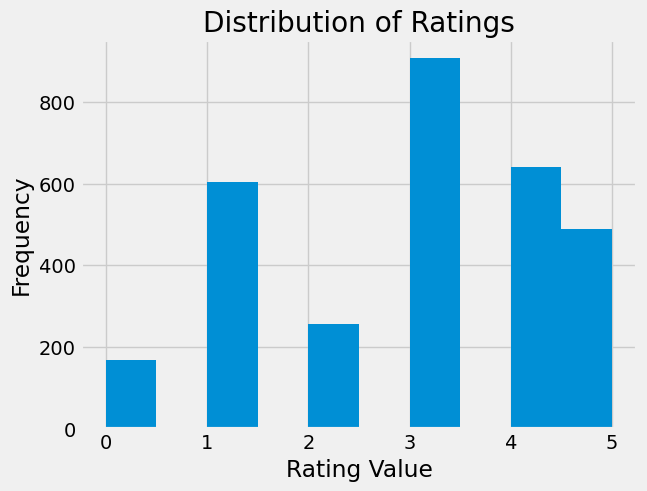

In [105]:
df['Rating'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()


 A majority of ratings cluster around the higher end of the scale, with 4.0 and 5.0 being the most frequent. This indicates a positive bias in the dataset, as lower ratings are significantly less common. Such a distribution might suggest high overall customer satisfaction or potential rating inflation. 


#### CHECKING THE SPREAD OF RATINGS

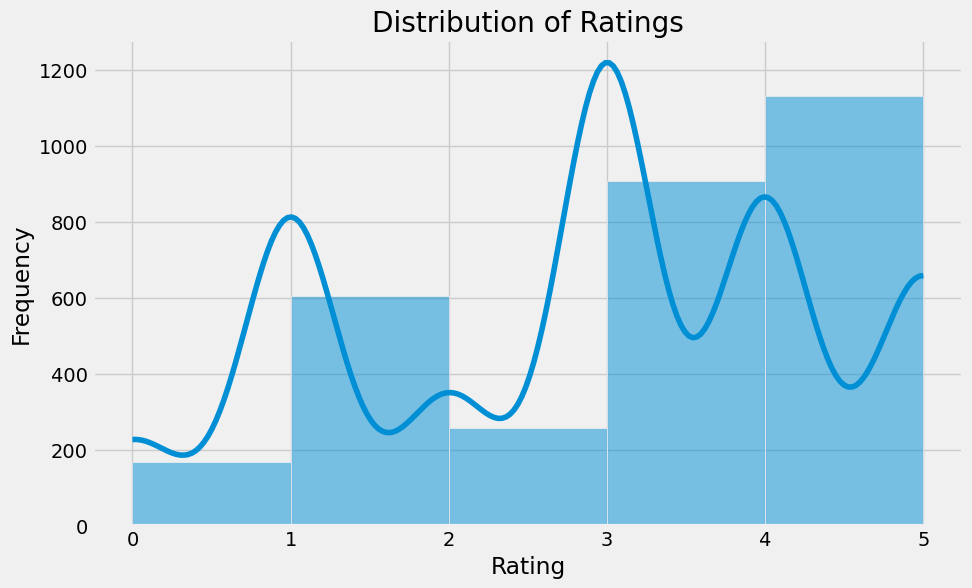

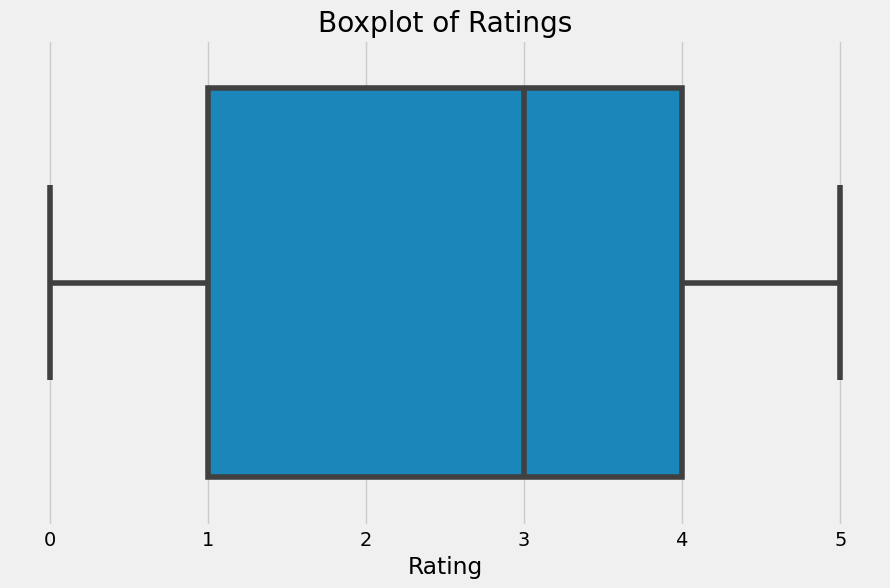

In [106]:
# Plot the distribution of the Rating column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the spread of Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()


 The histogram displaying rating frequencies reveals a right-skewed pattern, with a concentration of higher ratings. This suggests a positive bias in customer sentiment, as scores tend to cluster towards the upper end of the rating scale.










The boxplot reveals a relatively symmetrical distribution of ratings with minimal variation. The median rating falls around 3, indicating that half of the ratings are above this point and half are below. The box, representing the interquartile range, is relatively narrow, suggesting that the majority of ratings cluster around the median. The presence of whiskers and outliers is minimal, indicating a lack of extreme values in the dataset. 


#### CHECKING THE DISTRIBUTION OF REVIEW LENGTHS AND ITS RELATIONSHIP WITH RATING.

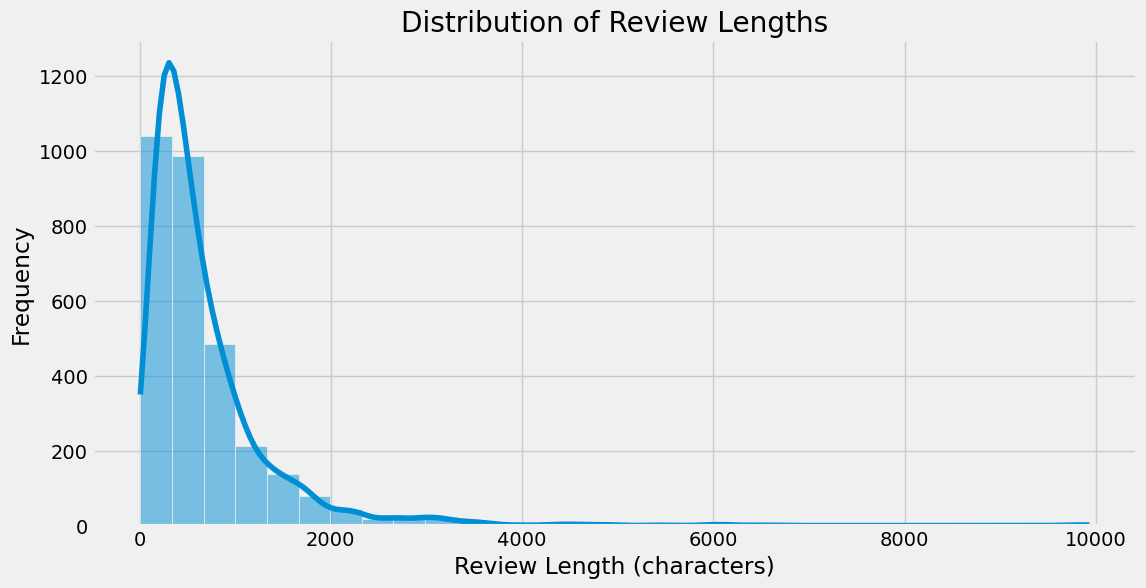

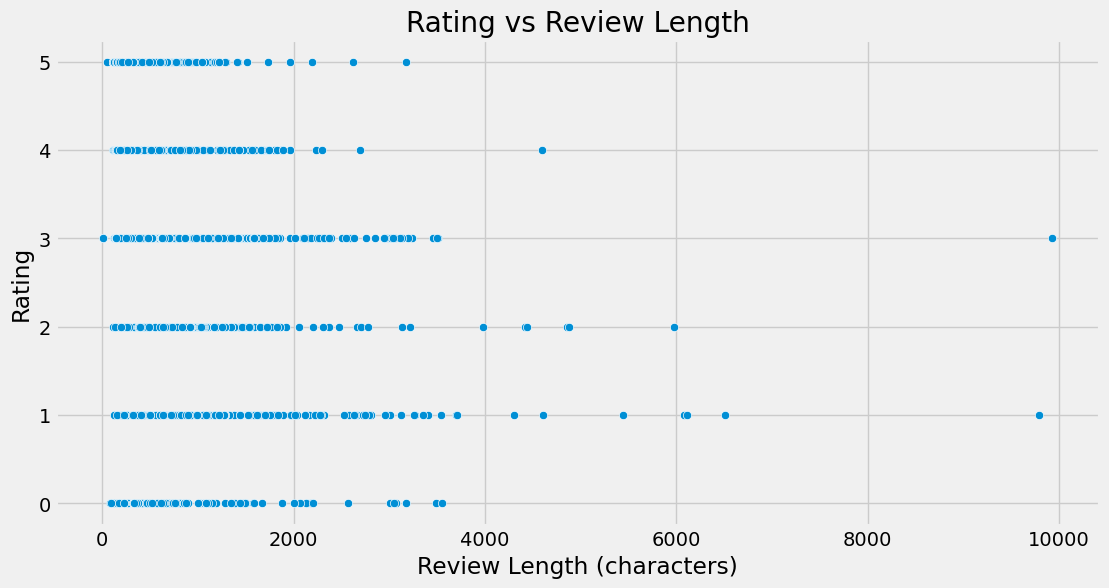

In [107]:
# Add a column for the length of each review
df['Review_Length'] = df['Review'].apply(lambda x: len(str(x)))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['Review_Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Scatterplot of Rating vs Review Length
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Review_Length', y='Rating', data=df)
plt.title('Rating vs Review Length')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()


The distribution is heavily skewed to the right, indicating that most reviews are relatively short. A significant portion of reviews falls within the first 2000 characters, with a rapid decline in frequency as review length increases. The presence of a long tail suggests the existence of a smaller number of very long reviews.

The scatter plot reveals a lack of correlation between review length and rating. This indicates that the length of a review does not significantly influence the score assigned by the customer. Factors beyond review length likely contribute more to the rating assigned by the customer.

#### WORD CLOUD FOR REVIEWS

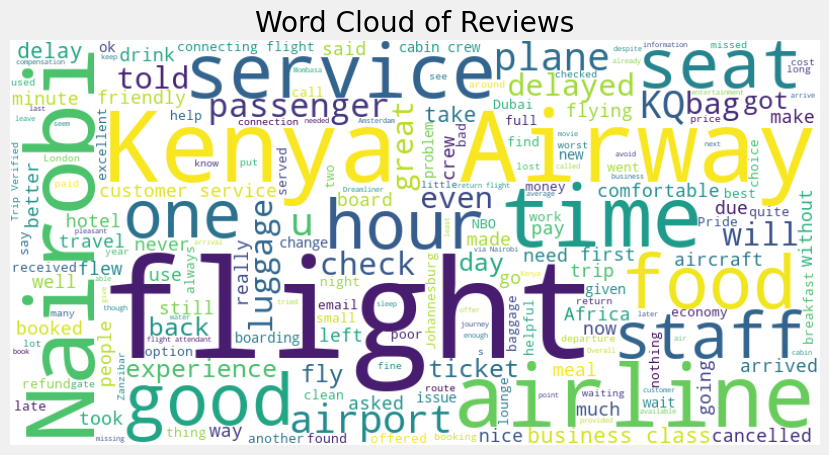

In [108]:


text = ' '.join(review for review in df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


#### TOP 20 POSITIVE AND NEGATIVE IMPACTFUL WORDS

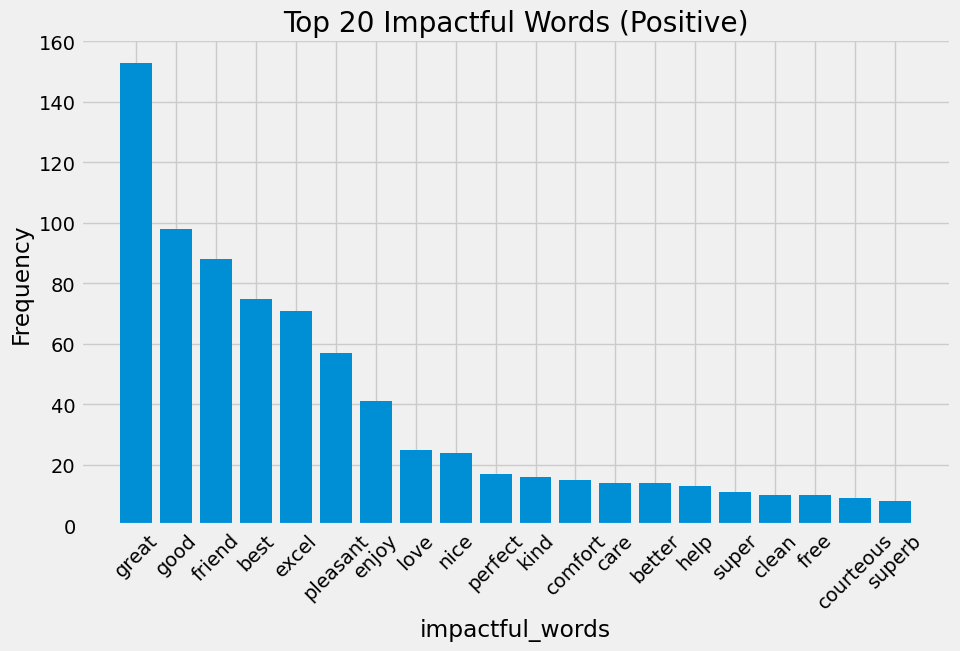

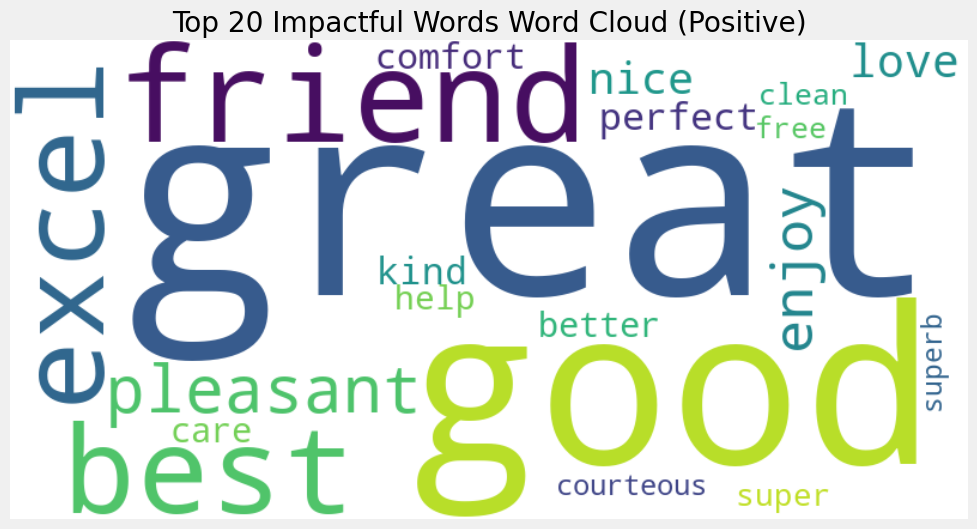

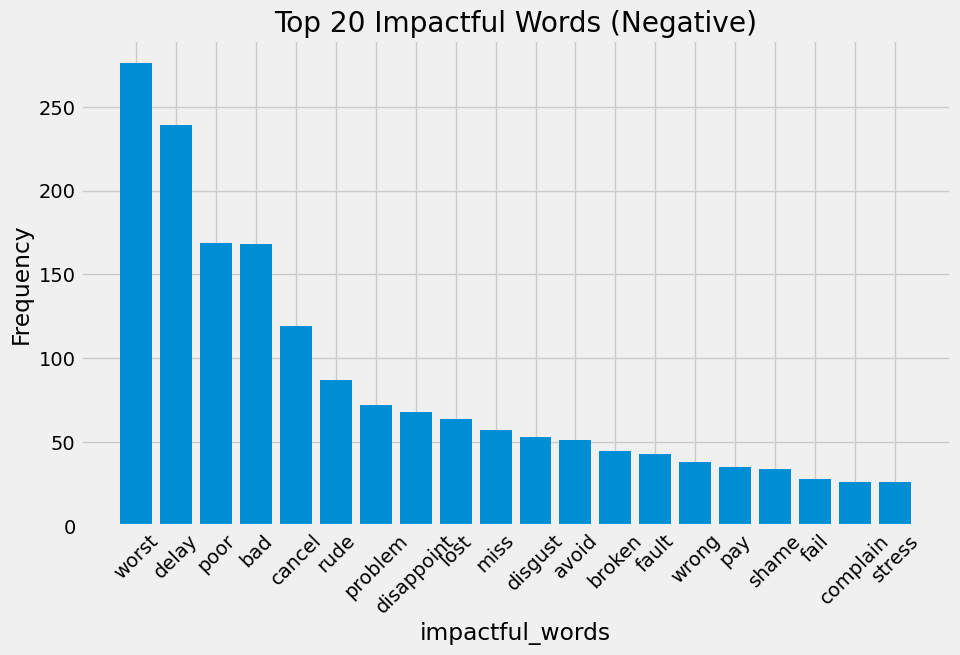

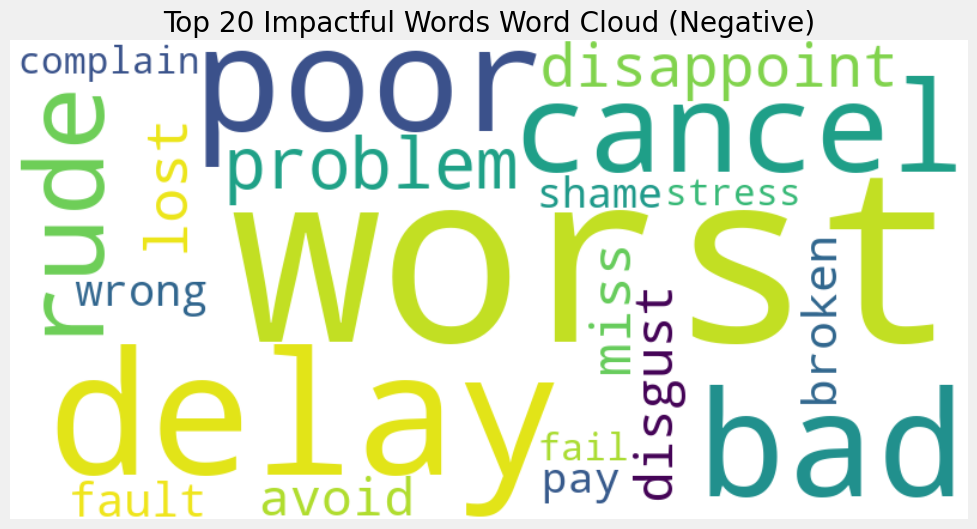

In [109]:
def plot_top_words(df, category, num_words=20, column='impactful_words'):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df[column].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')


#### AVERAGE RATING BY CLASS

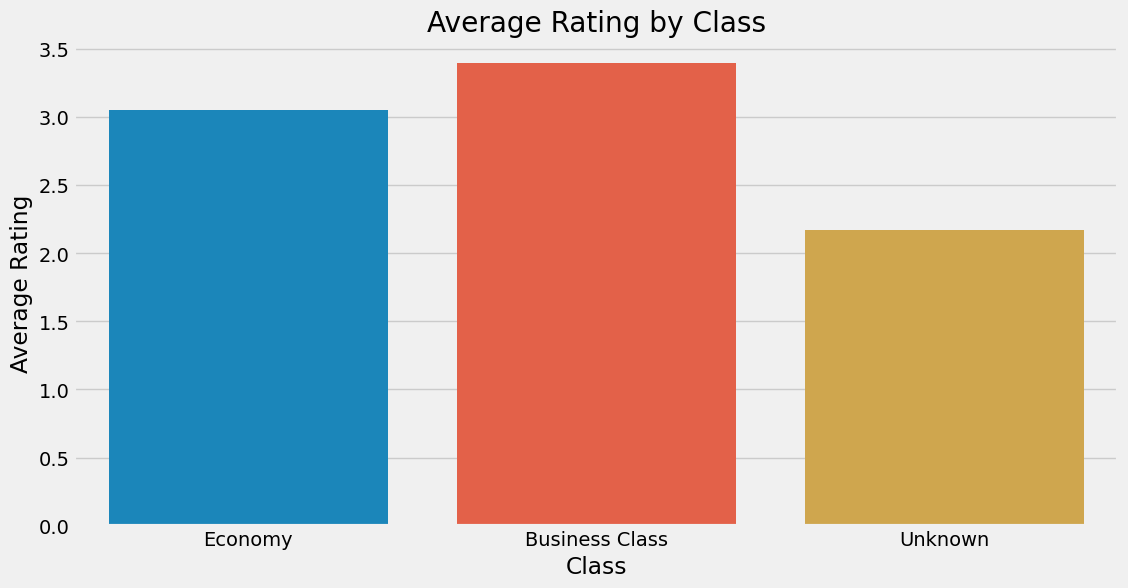

In [110]:
# Average Rating by Class
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Rating', data=df, ci=None)
plt.title('Average Rating by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.show()


There seems to be a clear disparity in average ratings based on passenger class. Business Class passengers report significantly higher satisfaction levels compared to Economy Class passengers. 



#### AVERAGE RATING BY DEPARTURE TYPE


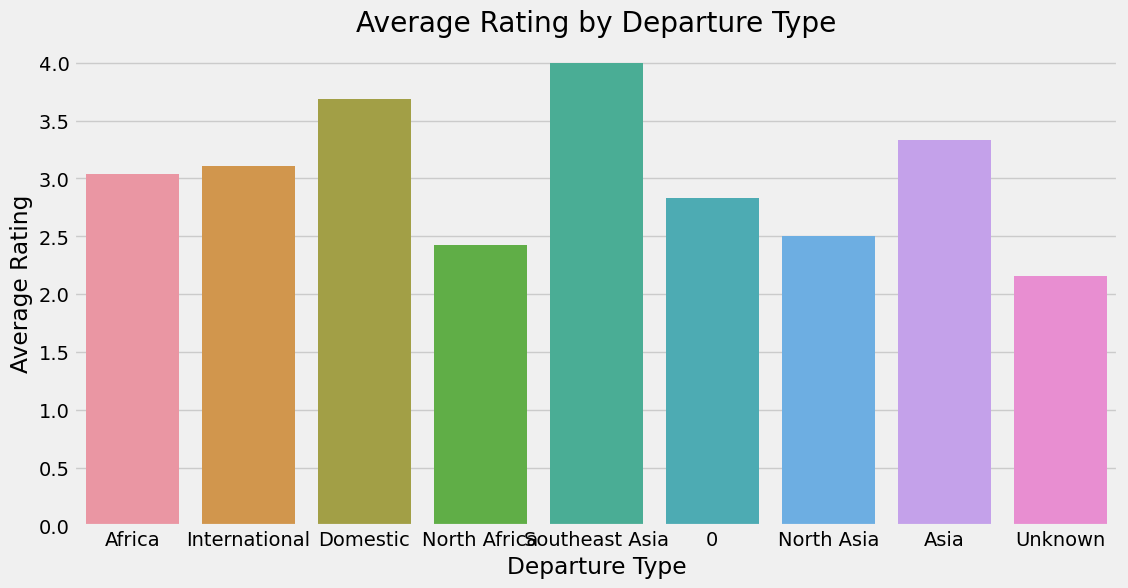

In [111]:
# Average Rating by Departure Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Departures', y='Rating', data=df, ci=None)
plt.title('Average Rating by Departure Type')
plt.xlabel('Departure Type')
plt.ylabel('Average Rating')
plt.show()


There are variations in average ratings across different departure types, suggesting that factors related to departure location might influence passenger satisfaction.

##### CORRELATION ANALYSIS BETWEEN RATING AND REVIEW LENGTH.


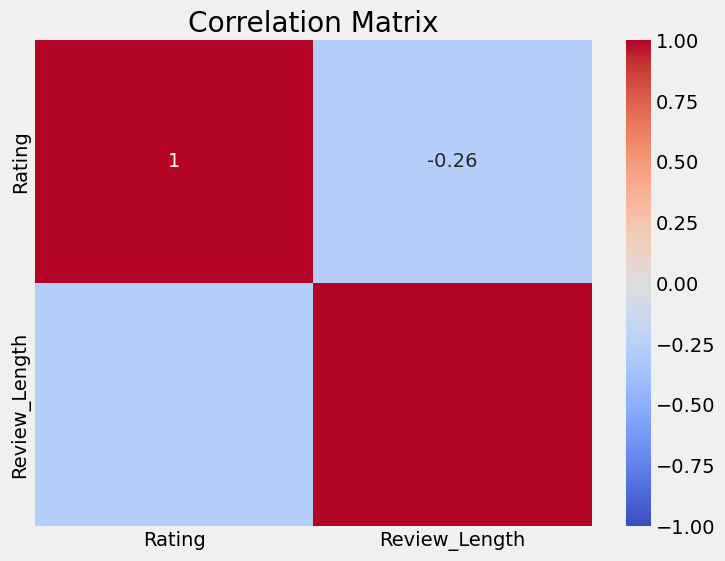

In [112]:
# Compute correlation matrix for numerical columns
correlation_matrix = df[['Rating', 'Review_Length']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix indicates a weak negative correlation (-0.26) between Rating and Review_Length. This implies that as the length of a review increases, the rating tends to slightly decrease, but the relationship is not particularly strong.

In other words, longer reviews are not necessarily associated with significantly higher or lower ratings. Other factors likely play a more significant role in determining the rating assigned to a review.

##  MODELLING

In [113]:
###  Prepare the data
KQ_df.columns

Index(['Rating_Description', 'Review', 'Rating', 'Tokenized_Review',
       'Impactful_Words'],
      dtype='object')

In [114]:
# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review','Rating' ,'Tokenized_Review', 'Impactful_Words']].head())
# Check the first few entries in the Tokenized_Review column
(KQ_df['Tokenized_Review'].head())

0    [recent, travel, busi, cape, town, entebb, uga...
1    [want, thank, jane, excel, servic, flight, con...
2    [not, bad, airlin, fli, could, better, select,...
3    [way, zanzibar, bangui, upgrad, flight, sky, p...
4    [absolut, appal, airlin, never, ever, use, inc...
Name: Tokenized_Review, dtype: object

In [115]:
# Define the mapping from numerical ratings to sentiments
rating_mapping = {
    0.0: 'negative',
    1.0: 'negative',
    2.0: 'negative',
    3.0: 'neutral',
    4.0: 'positive',
    5.0: 'positive'
}

# Apply the mapping to the 'Rating' column
df['sentiment'] = df['Rating'].map(rating_mapping)

# Check the transformation
print(df[['Rating', 'sentiment']].head())


# Check the final DataFrame
df.head()

   Rating sentiment
0     4.0  positive
1     5.0  positive
2     4.0  positive
3     1.0  negative
4     1.0  negative


,Date3,Departures,Class,Review,Rating,Rating_Description,Review_Length,sentiment
0,2022-09-01 00:00:00,Africa,Economy,Recently I travelled for business from Cape To...,4.0,Good,1439,positive
1,2022-11-01 00:00:00,International,Economy,I want to thanks to Jane for her excellent ser...,5.0,Excellent,299,positive
2,2022-05-01 00:00:00,International,Economy,not a bad airline to fly with could do with a ...,4.0,Good,155,positive
3,2022-11-01 00:00:00,Africa,Business Class,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0,Poor,3408,negative
4,2022-11-01 00:00:00,Africa,Economy,"Absolutely appalling airline, never ever use i...",1.0,Poor,1152,negative


In [116]:
# Preprocessing
import numpy as np
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import nltk
from nltk.stem import PorterStemmer
from sklearn.svm import SVC

In [117]:
# Initialize NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def preprocess_text(text):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [ps.stem(w) for w in words if w not in stop_words and w.isalpha()]
    return ' '.join(words)

def get_review_sentiment(review):
    sentiment_score = sia.polarity_scores(review)['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

def determine_final_sentiment(row):
    review_sentiment = get_review_sentiment(row['Review'])
    rating = row['Rating']
    
    if review_sentiment == 'positive' or rating >= 4:
        return 'positive'
    elif review_sentiment == 'negative' or rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to determine sentiment
KQ_df['sentiment'] = df.apply(determine_final_sentiment, axis=1)

# Check the transformation
(KQ_df[['Rating', 'Review', 'sentiment']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Rating,Review,sentiment
0,4.0,recent travel busi cape town entebb uganda lay...,positive
1,5.0,want thank jane excel servic flight connect ke...,positive
2,4.0,not bad airlin fli could better select movi mu...,positive
3,1.0,way zanzibar bangui upgrad flight sky prioriti...,negative
4,1.0,absolut appal airlin never ever use incred unr...,negative


# Modelling

In [118]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline  # Import Pipeline from imblearn
from imblearn.over_sampling import SMOTE  # Import SMOTE from imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import joblib

In [125]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [ps.stem(w) for w in words if w not in stop_words and w.isalpha()]
    return ' '.join(words)

# Define a function to convert Rating into sentiment label
def get_sentiment_label(rating, review_sentiment):
    if review_sentiment == 'positive':
        if rating >= 4:
            return 'positive'
        elif rating <= 2:
            return 'conflicting'
        else:
            return 'neutral'
    elif review_sentiment == 'negative':
        if rating <= 2:
            return 'negative'
        elif rating >= 4:
            return 'conflicting'
        else:
            return 'neutral'
    else:
        return 'neutral'

# Function to determine review sentiment
def get_review_sentiment(review):
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Sample DataFrame creation for demonstration
# Replace this with your actual data loading code
# KQ_df = pd.read_csv('your_data.csv')  # Example

# Apply preprocessing to the 'Review' column
KQ_df['Processed_Review'] = KQ_df['Review'].apply(preprocess_text)

# Apply sentiment labeling based on review sentiment and rating
KQ_df['Sentiment'] = KQ_df.apply(lambda row: get_sentiment_label(row['Rating'], get_review_sentiment(row['Review'])), axis=1)

# Encode labels as numeric values
label_encoder = LabelEncoder()
KQ_df['Sentiment_encoded'] = label_encoder.fit_transform(KQ_df['Sentiment'])

# Features and labels
X = KQ_df[['Processed_Review', 'Rating']]
y = KQ_df['Sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a preprocessor with TF-IDF and StandardScaler for Rating
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Processed_Review'),
        ('num', StandardScaler(), ['Rating'])
    ])

def evaluate_and_store(model):
    results = {}
   
    # Create a pipeline with preprocessor, SMOTE, and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),  # Add SMOTE here
        ('clf', model)
    ])
   
    # Train the model
    pipeline.fit(X_train, y_train)
   
    # Make predictions
    y_pred = pipeline.predict(X_test)
   
    # Decode predictions and true values for reporting
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)
   
    # Store classification report
    results['classification_report'] = classification_report(y_test_labels, y_pred_labels, output_dict=True)
   
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
    results['confusion_matrix'] = conf_matrix
   
    # Store ROC Curve and AUC
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):  # Check if model has predict_proba method
        y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
        y_pred_prob = pipeline.predict_proba(X_test)
       
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(len(label_encoder.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
       
        results['roc_curve'] = {
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }
   
    # Store model accuracy
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    results['accuracy'] = accuracy
   
    # Store test score
    test_score = pipeline.score(X_test, y_test)
    results['test_score'] = test_score
   
    return results

def display_results(results, model_name):
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(results['classification_report'])
   
    # Print Confusion Matrix
    print(f"Confusion Matrix for {model_name}:")
    print(results['confusion_matrix'])

    plt.figure(figsize=(10, 7))
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
   
    
    # Plot ROC Curve and AUC
    if 'roc_curve' in results:
        plt.figure()
        for i in range(len(label_encoder.classes_)):
            plt.plot(results['roc_curve']['fpr'][i], results['roc_curve']['tpr'][i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {results["roc_curve"]["roc_auc"][i]:.2f})')
       
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name}')
        plt.legend(loc="lower right")
        plt.show()
   
    # Print Model Accuracy
    print(f"Model Accuracy for {model_name}: {results['accuracy']:.2f}")
   
    # Print Test Score
    print(f"Model Test Score for {model_name}: {results['test_score']:.2f}")

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}

# Evaluate and store results for all models
results_dict = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")
    results = evaluate_and_store(model)
    results_dict[model_name] = results





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Evaluating Logistic Regression...


Evaluating Random Forest...


Evaluating SVM...


Evaluating KNN...


Evaluating Gradient Boosting...


Evaluating AdaBoost...


Evaluating Decision Tree...


Evaluating Neural Network...


Evaluating XGBoost...



# 1.Logistic Regression.

Classification Report for Logistic Regression:
{'conflicting': {'precision': 0.40860215053763443, 'recall': 0.4175824175824176, 'f1-score': 0.4130434782608696, 'support': 91}, 'negative': {'precision': 0.8037383177570093, 'recall': 0.7747747747747747, 'f1-score': 0.7889908256880734, 'support': 222}, 'neutral': {'precision': 0.9328621908127208, 'recall': 0.88, 'f1-score': 0.9056603773584906, 'support': 300}, 'positive': {'precision': 0.9242424242424242, 'recall': 0.993485342019544, 'f1-score': 0.9576138147566718, 'support': 307}, 'accuracy': 0.8467391304347827, 'macro avg': {'precision': 0.7673612708374472, 'recall': 0.766460633594184, 'f1-score': 0.7663271240160264, 'support': 920}, 'weighted avg': {'precision': 0.8469715040513275, 'recall': 0.8467391304347827, 'f1-score': 0.8461179066981923, 'support': 920}}
Confusion Matrix for Logistic Regression:
[[ 38  32   4  17]
 [ 37 172  13   0]
 [ 18  10 264   8]
 [  0   0   2 305]]


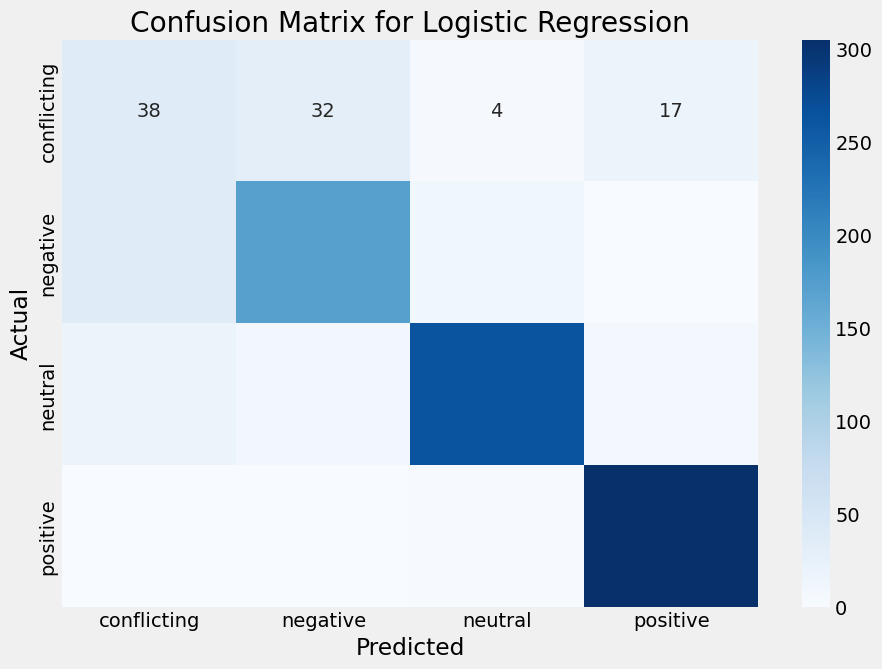

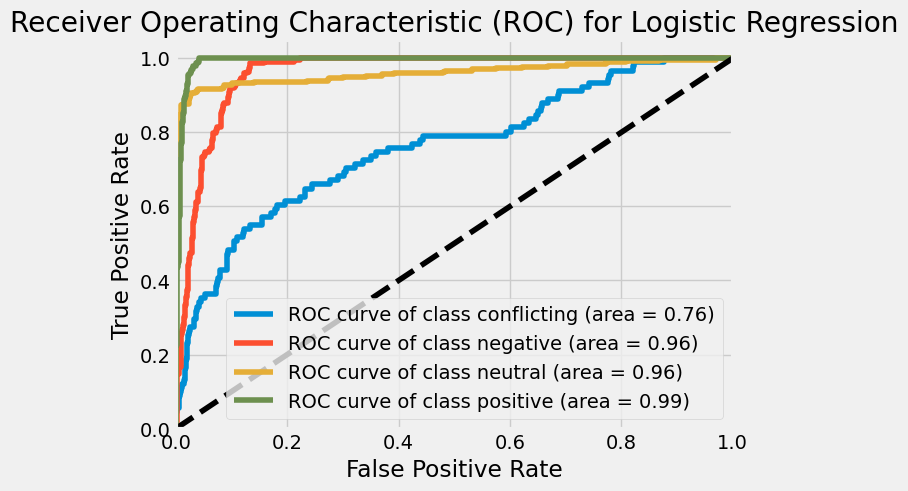

Model Accuracy for Logistic Regression: 0.85
Model Test Score for Logistic Regression: 0.85


In [126]:
 #Display results for a specific model when needed

display_results(results_dict['Logistic Regression'], 'Logistic Regression')

# 2.Random Forest

Classification Report for Random Forest:
{'conflicting': {'precision': 0.2857142857142857, 'recall': 0.06593406593406594, 'f1-score': 0.10714285714285714, 'support': 91}, 'negative': {'precision': 0.7552742616033755, 'recall': 0.8063063063063063, 'f1-score': 0.7799564270152506, 'support': 222}, 'neutral': {'precision': 0.780952380952381, 'recall': 0.82, 'f1-score': 0.8, 'support': 300}, 'positive': {'precision': 0.8703170028818443, 'recall': 0.9837133550488599, 'f1-score': 0.9235474006116208, 'support': 307}, 'accuracy': 0.7967391304347826, 'macro avg': {'precision': 0.6730644827879717, 'recall': 0.668988431822308, 'f1-score': 0.6526616711924321, 'support': 920}, 'weighted avg': {'precision': 0.7555912176591194, 'recall': 0.7967391304347826, 'f1-score': 0.7678580204186447, 'support': 920}}
Confusion Matrix for Random Forest:
[[  6  36  30  19]
 [  5 179  37   1]
 [  8  21 246  25]
 [  2   1   2 302]]


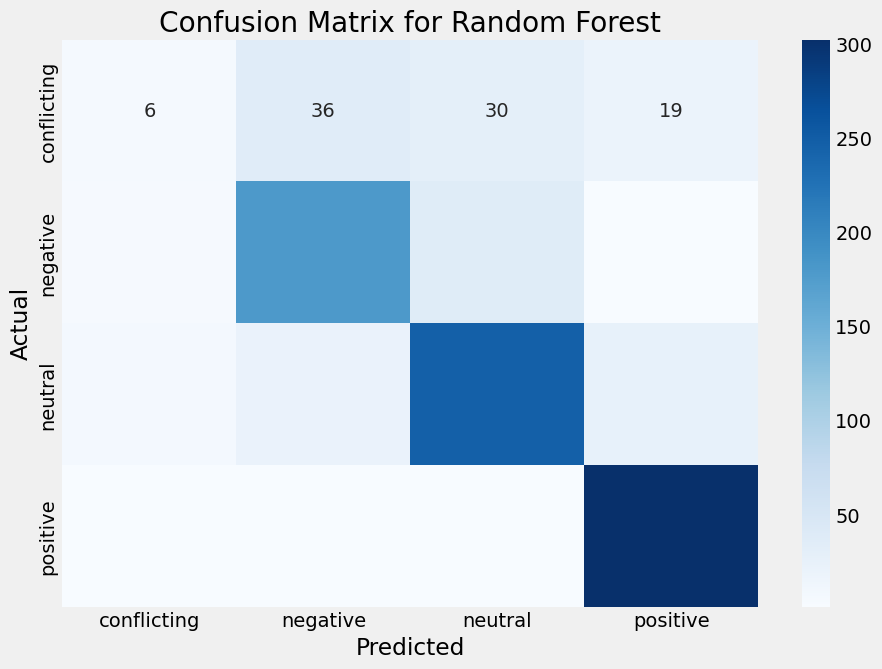

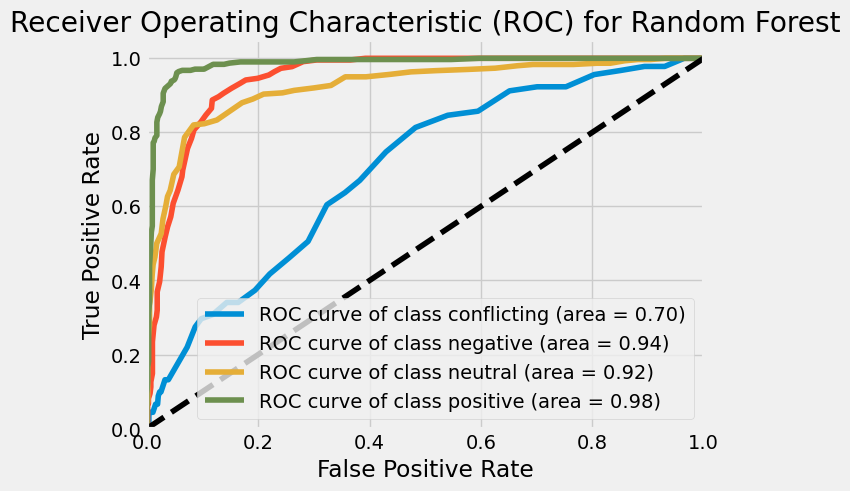

Model Accuracy for Random Forest: 0.80
Model Test Score for Random Forest: 0.80


In [127]:
display_results(results_dict['Random Forest'], 'Random Forest')

# 3.Decision Tree

Classification Report for Decision Tree:
{'conflicting': {'precision': 0.35051546391752575, 'recall': 0.37362637362637363, 'f1-score': 0.3617021276595745, 'support': 91}, 'negative': {'precision': 0.7737556561085973, 'recall': 0.7702702702702703, 'f1-score': 0.7720090293453724, 'support': 222}, 'neutral': {'precision': 0.9453924914675768, 'recall': 0.9233333333333333, 'f1-score': 0.9342327150084316, 'support': 300}, 'positive': {'precision': 0.9320388349514563, 'recall': 0.9381107491856677, 'f1-score': 0.935064935064935, 'support': 307}, 'accuracy': 0.8369565217391305, 'macro avg': {'precision': 0.7504256116112891, 'recall': 0.7513351816039112, 'f1-score': 0.7507522017695784, 'support': 920}, 'weighted avg': {'precision': 0.8406786224380147, 'recall': 0.8369565217391305, 'f1-score': 0.8387343996729983, 'support': 920}}
Confusion Matrix for Decision Tree:
[[ 34  40   3  14]
 [ 46 171   5   0]
 [  6  10 277   7]
 [ 11   0   8 288]]


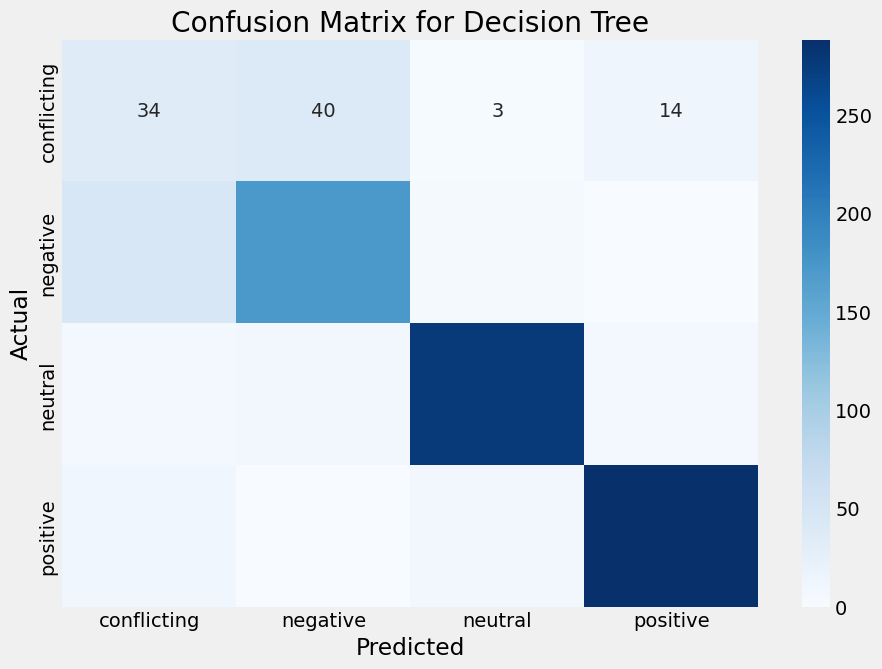

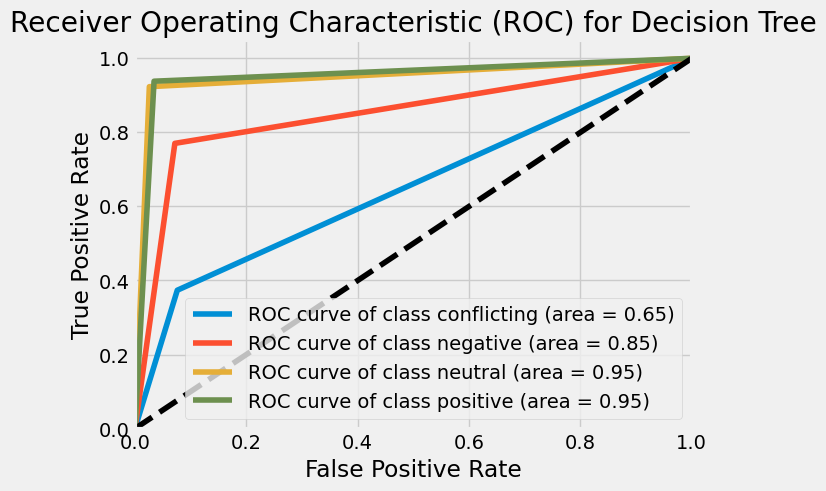

Model Accuracy for Decision Tree: 0.84
Model Test Score for Decision Tree: 0.84


In [128]:
display_results(results_dict['Decision Tree'], 'Decision Tree')

# 4.SVM

Classification Report for SVM:
{'conflicting': {'precision': 0.6071428571428571, 'recall': 0.37362637362637363, 'f1-score': 0.46258503401360546, 'support': 91}, 'negative': {'precision': 0.7790697674418605, 'recall': 0.9054054054054054, 'f1-score': 0.8375, 'support': 222}, 'neutral': {'precision': 1.0, 'recall': 0.9133333333333333, 'f1-score': 0.9547038327526133, 'support': 300}, 'positive': {'precision': 0.9246987951807228, 'recall': 1.0, 'f1-score': 0.9608763693270735, 'support': 307}, 'accuracy': 0.8869565217391304, 'macro avg': {'precision': 0.8277278549413601, 'recall': 0.7980912780912781, 'f1-score': 0.8039163090233231, 'support': 920}, 'weighted avg': {'precision': 0.8827021940136685, 'recall': 0.8869565217391304, 'f1-score': 0.8798048188091669, 'support': 920}}
Confusion Matrix for SVM:
[[ 34  40   0  17]
 [ 21 201   0   0]
 [  1  17 274   8]
 [  0   0   0 307]]


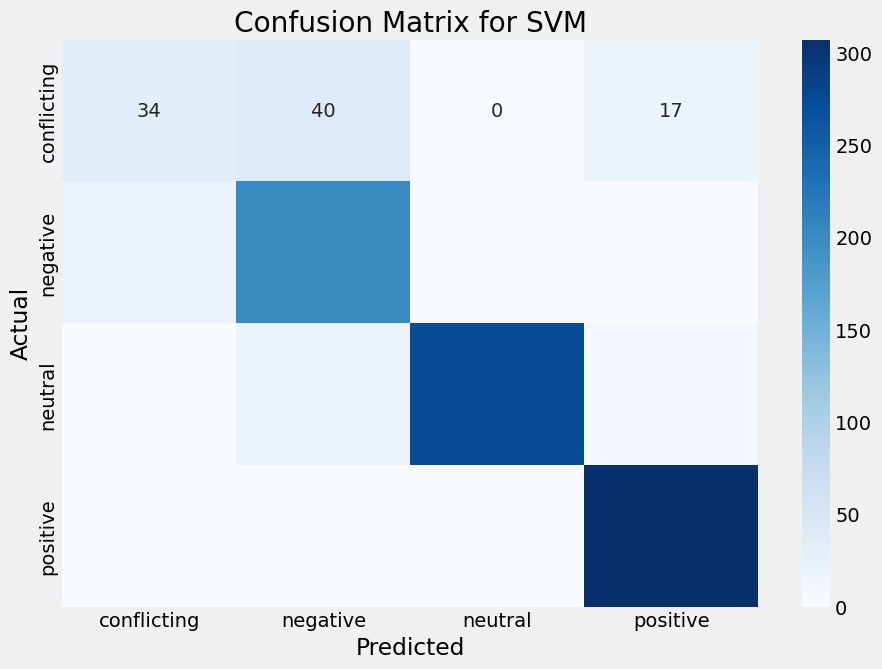

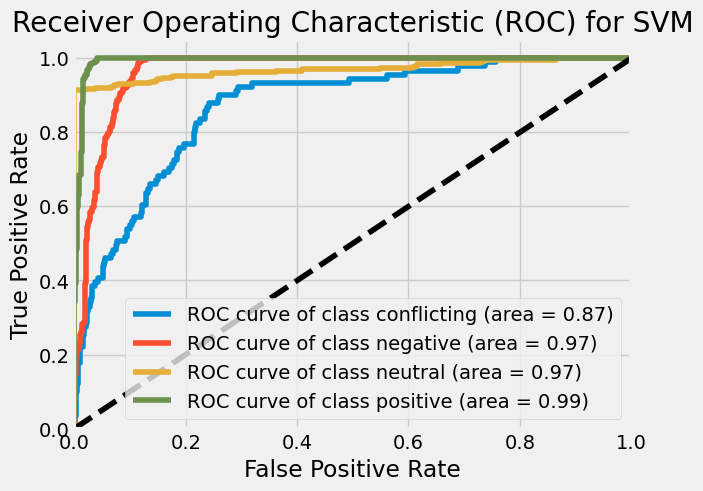

Model Accuracy for SVM: 0.89
Model Test Score for SVM: 0.89


In [129]:
display_results(results_dict['SVM'], 'SVM')

# 5.KNN

Classification Report for KNN:
{'conflicting': {'precision': 0.1496881496881497, 'recall': 0.7912087912087912, 'f1-score': 0.2517482517482518, 'support': 91}, 'negative': {'precision': 0.7984496124031008, 'recall': 0.46396396396396394, 'f1-score': 0.5868945868945868, 'support': 222}, 'neutral': {'precision': 1.0, 'recall': 0.91, 'f1-score': 0.9528795811518325, 'support': 300}, 'positive': {'precision': 1.0, 'recall': 0.12052117263843648, 'f1-score': 0.21511627906976744, 'support': 307}, 'accuracy': 0.5271739130434783, 'macro avg': {'precision': 0.7370344405228126, 'recall': 0.5714234819527979, 'f1-score': 0.5016596747161096, 'support': 920}, 'weighted avg': {'precision': 0.8672580821468587, 'recall': 0.5271739130434783, 'f1-score': 0.5490263708909321, 'support': 920}}
Confusion Matrix for KNN:
[[ 72  19   0   0]
 [119 103   0   0]
 [ 20   7 273   0]
 [270   0   0  37]]


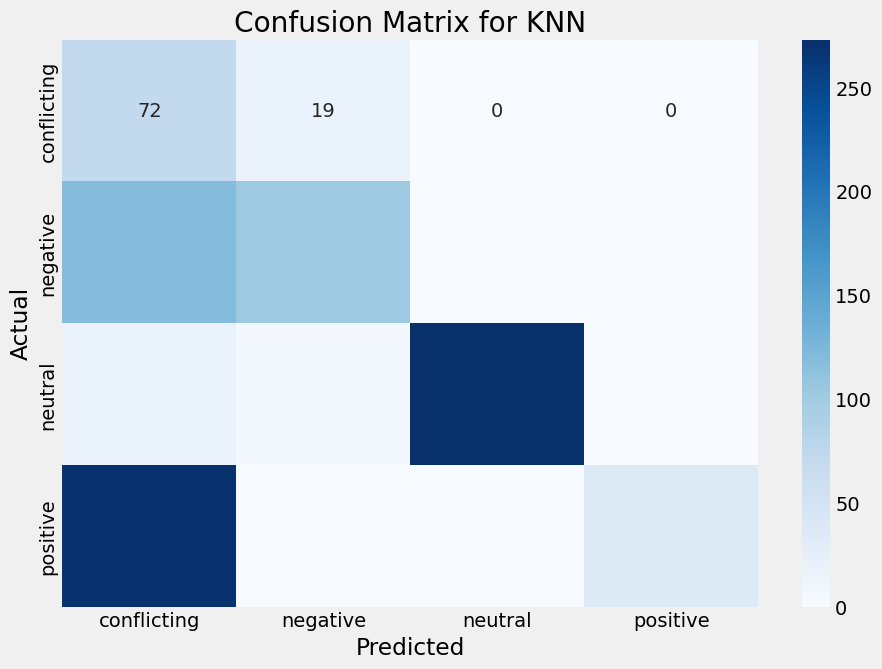

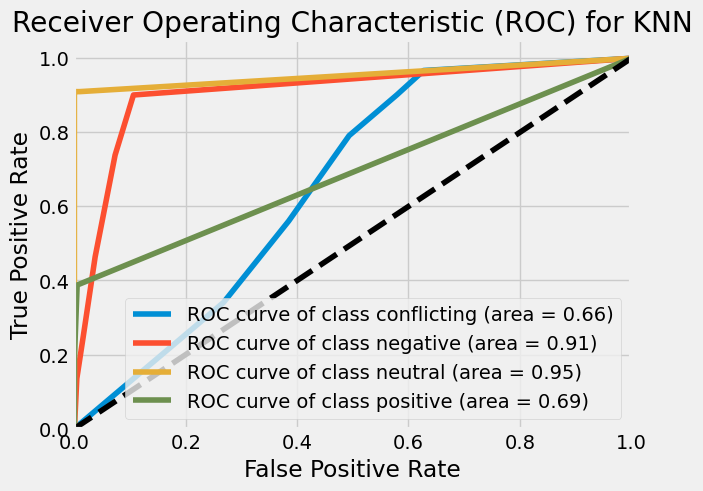

Model Accuracy for KNN: 0.53
Model Test Score for KNN: 0.53


In [130]:
display_results(results_dict['KNN'], 'KNN')

# 6.XGBOOST

Classification Report for XGBoost:
{'conflicting': {'precision': 0.4507042253521127, 'recall': 0.3516483516483517, 'f1-score': 0.39506172839506176, 'support': 91}, 'negative': {'precision': 0.78099173553719, 'recall': 0.8513513513513513, 'f1-score': 0.8146551724137931, 'support': 222}, 'neutral': {'precision': 0.9963636363636363, 'recall': 0.9133333333333333, 'f1-score': 0.9530434782608695, 'support': 300}, 'positive': {'precision': 0.9246987951807228, 'recall': 1.0, 'f1-score': 0.9608763693270735, 'support': 307}, 'accuracy': 0.8717391304347826, 'macro avg': {'precision': 0.7881895981084155, 'recall': 0.779083259083259, 'f1-score': 0.7809091870991995, 'support': 920}, 'weighted avg': {'precision': 0.8665063813324687, 'recall': 0.8717391304347826, 'f1-score': 0.8670719069798751, 'support': 920}}
Confusion Matrix for XGBoost:
[[ 32  41   1  17]
 [ 33 189   0   0]
 [  6  12 274   8]
 [  0   0   0 307]]


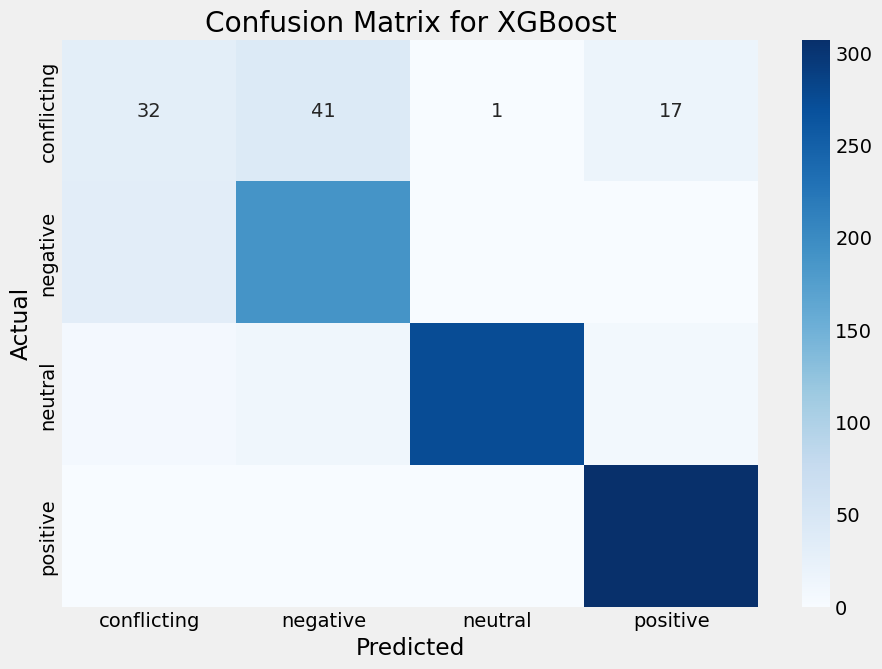

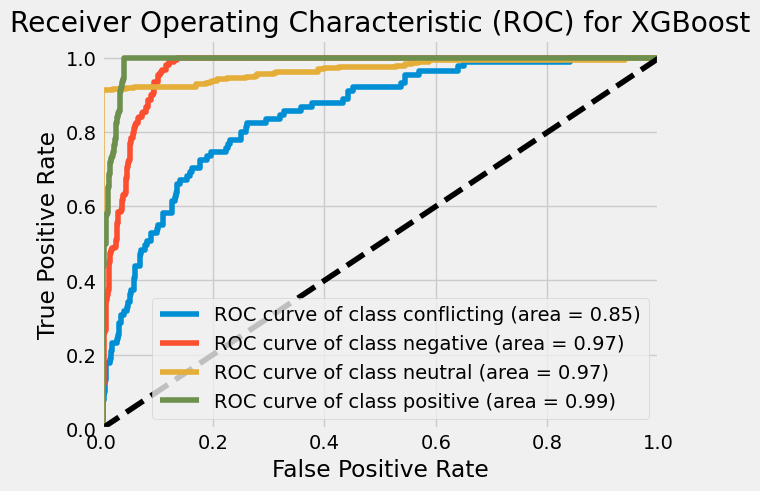

Model Accuracy for XGBoost: 0.87
Model Test Score for XGBoost: 0.87


In [131]:
display_results(results_dict['XGBoost'], 'XGBoost')

# 7.Neural Network

Classification Report for Neural Network:
{'conflicting': {'precision': 0.38235294117647056, 'recall': 0.2857142857142857, 'f1-score': 0.3270440251572327, 'support': 91}, 'negative': {'precision': 0.7729257641921398, 'recall': 0.7972972972972973, 'f1-score': 0.7849223946784922, 'support': 222}, 'neutral': {'precision': 0.7718120805369127, 'recall': 0.7666666666666667, 'f1-score': 0.7692307692307693, 'support': 300}, 'positive': {'precision': 0.8707692307692307, 'recall': 0.9218241042345277, 'f1-score': 0.8955696202531646, 'support': 307}, 'accuracy': 0.7782608695652173, 'macro avg': {'precision': 0.6994650041686885, 'recall': 0.6928755884781943, 'f1-score': 0.6941917023299147, 'support': 920}, 'weighted avg': {'precision': 0.7665797992445017, 'recall': 0.7782608695652173, 'f1-score': 0.7714379153205281, 'support': 920}}
Confusion Matrix for Neural Network:
[[ 26  32  21  12]
 [ 22 177  23   0]
 [ 20  20 230  30]
 [  0   0  24 283]]


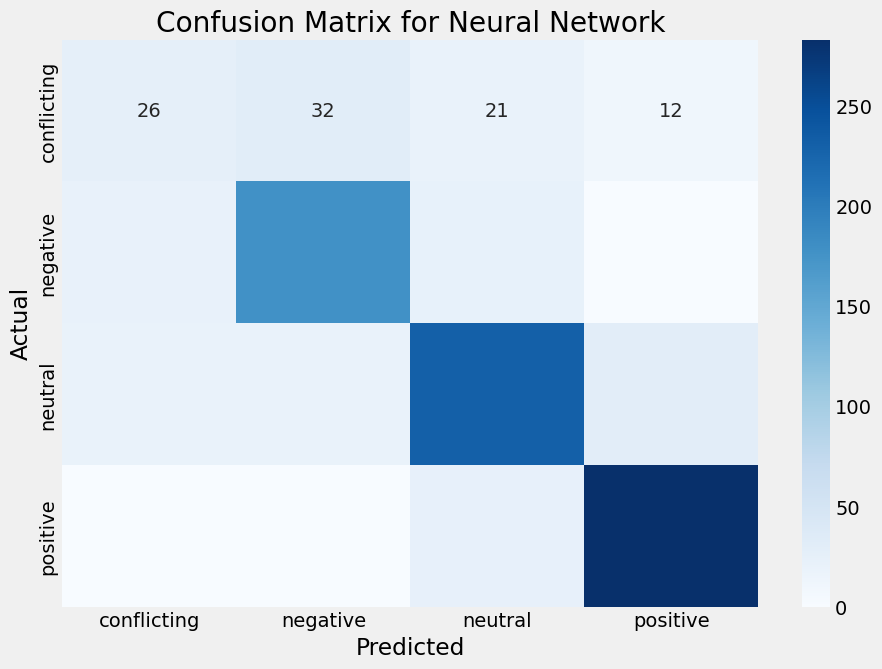

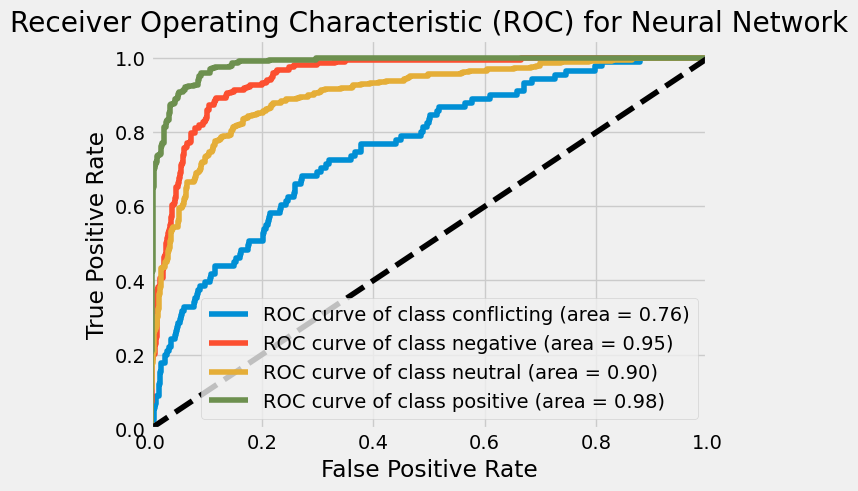

Model Accuracy for Neural Network: 0.78
Model Test Score for Neural Network: 0.78


In [132]:
display_results(results_dict['Neural Network'], 'Neural Network')

# 8.Gradient Boosting

Classification Report for Gradient Boosting:
{'conflicting': {'precision': 0.45714285714285713, 'recall': 0.3516483516483517, 'f1-score': 0.3975155279503106, 'support': 91}, 'negative': {'precision': 0.7745901639344263, 'recall': 0.8513513513513513, 'f1-score': 0.8111587982832617, 'support': 222}, 'neutral': {'precision': 1.0, 'recall': 0.9133333333333333, 'f1-score': 0.9547038327526133, 'support': 300}, 'positive': {'precision': 0.9246987951807228, 'recall': 1.0, 'f1-score': 0.9608763693270735, 'support': 307}, 'accuracy': 0.8717391304347826, 'macro avg': {'precision': 0.7891079540645015, 'recall': 0.779083259083259, 'f1-score': 0.7810636320783148, 'support': 920}, 'weighted avg': {'precision': 0.8667842896890484, 'recall': 0.8717391304347826, 'f1-score': 0.8670123494256065, 'support': 920}}
Confusion Matrix for Gradient Boosting:
[[ 32  42   0  17]
 [ 33 189   0   0]
 [  5  13 274   8]
 [  0   0   0 307]]


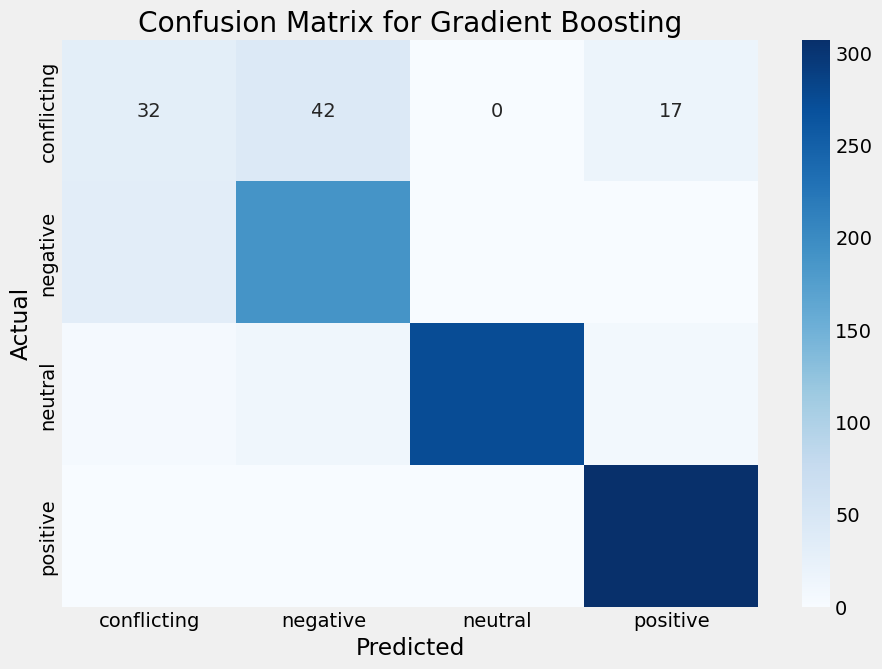

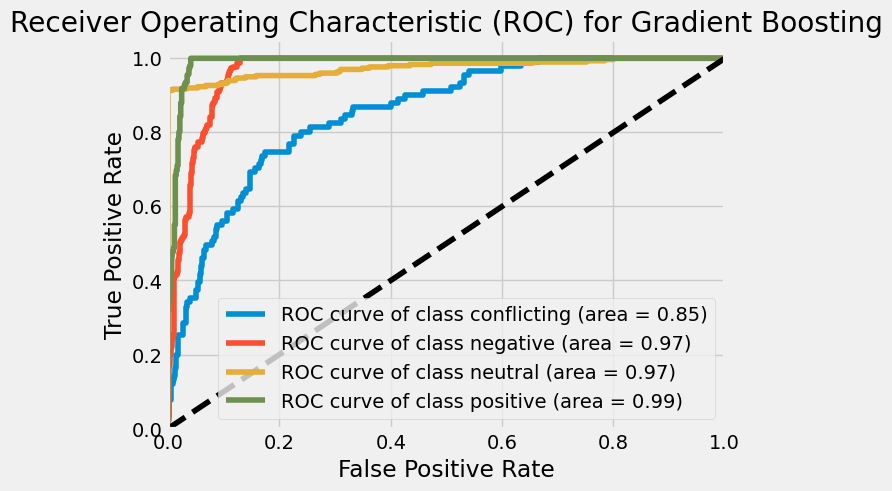

Model Accuracy for Gradient Boosting: 0.87
Model Test Score for Gradient Boosting: 0.87


In [133]:
display_results(results_dict['Gradient Boosting'], 'Gradient Boosting')

# 9.AdaBoosting

Classification Report for AdaBoost:
{'conflicting': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 91}, 'negative': {'precision': 0.7070063694267515, 'recall': 1.0, 'f1-score': 0.8283582089552238, 'support': 222}, 'neutral': {'precision': 1.0, 'recall': 0.9133333333333333, 'f1-score': 0.9547038327526133, 'support': 300}, 'positive': {'precision': 0.9246987951807228, 'recall': 1.0, 'f1-score': 0.9608763693270735, 'support': 307}, 'accuracy': 0.8728260869565218, 'macro avg': {'precision': 0.6579262911518686, 'recall': 0.7283333333333333, 'f1-score': 0.6859846027587276, 'support': 920}, 'weighted avg': {'precision': 0.805258634927414, 'recall': 0.8728260869565218, 'f1-score': 0.8318431713013644, 'support': 920}}
Confusion Matrix for AdaBoost:
[[  0  74   0  17]
 [  0 222   0   0]
 [  0  18 274   8]
 [  0   0   0 307]]


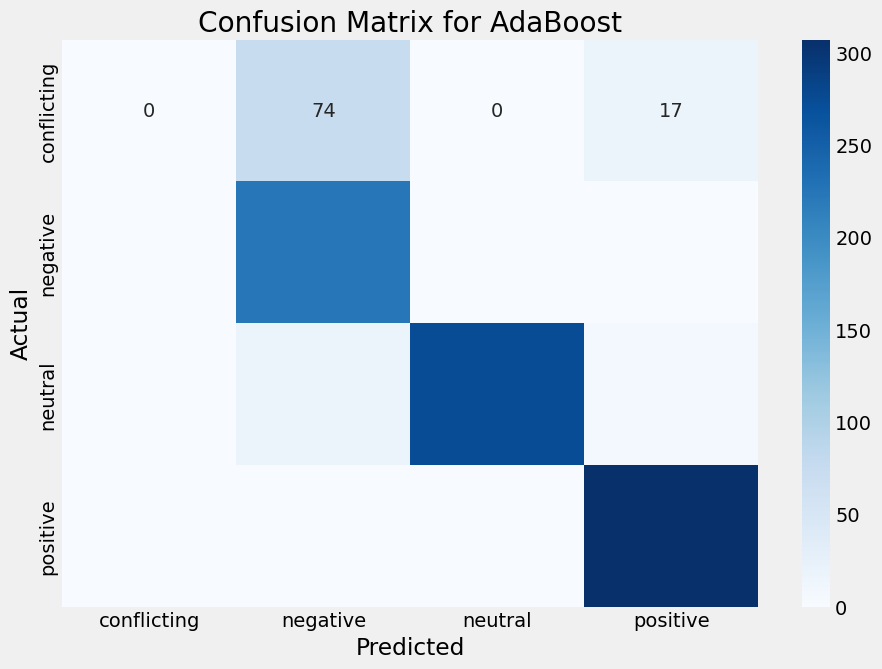

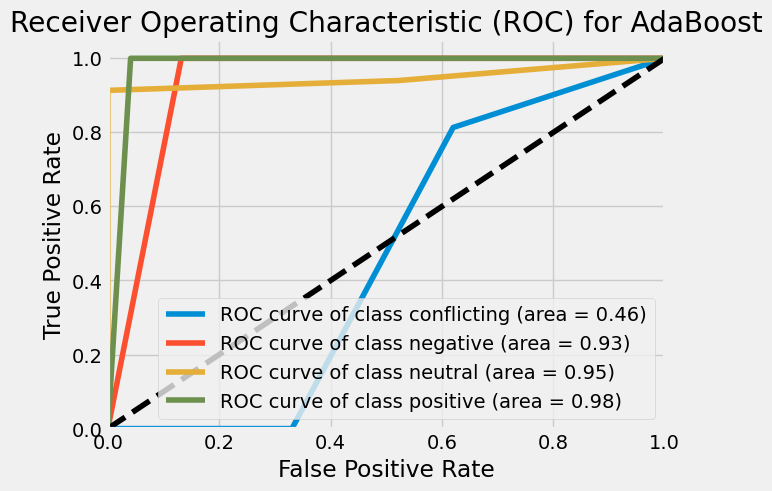

Model Accuracy for AdaBoost: 0.87
Model Test Score for AdaBoost: 0.87


In [134]:
display_results(results_dict['AdaBoost'], 'AdaBoost')

# Saving the best Model

In [137]:
import pickle


# Save the model to a file
with open('SVC', 'wb') as file:
    pickle.dump(SVC, file)

print("SVM model has been saved successfully.")


SVM model has been saved successfully.


# Model Evalution

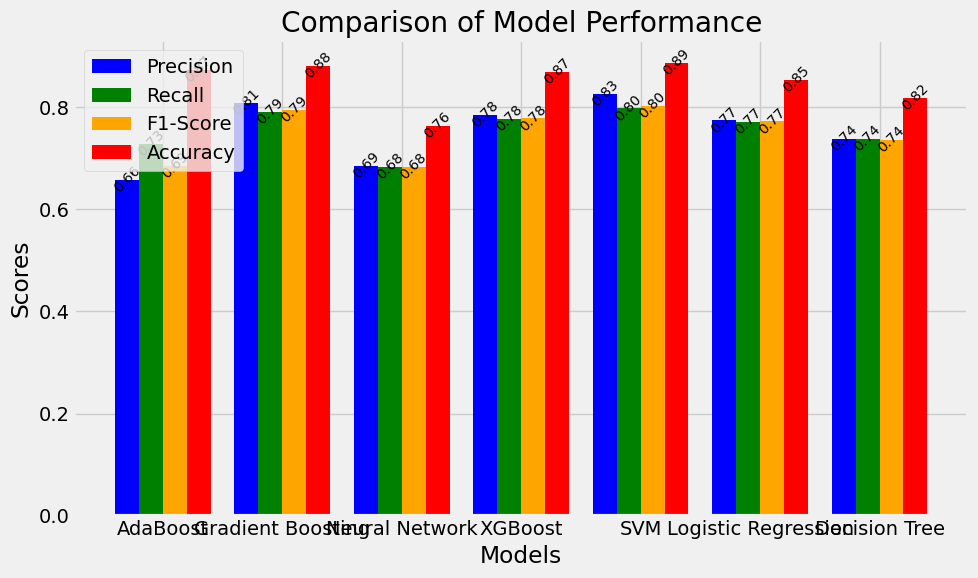

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['AdaBoost', 'Gradient Boosting', 'Neural Network', 'XGBoost', 'SVM', 'Logistic Regression', 'Decision Tree']

# Precision, Recall, F1-Score, and Accuracy for each model (based on provided data)
precision = [0.6579, 0.8082, 0.6857, 0.7846, 0.8258, 0.7746, 0.7385]
recall = [0.7283, 0.7908, 0.6841, 0.7768, 0.7981, 0.7714, 0.7387]
f1_score = [0.6860, 0.7943, 0.6841, 0.7784, 0.8036, 0.7725, 0.7361]
accuracy = [0.8728, 0.8815, 0.7630, 0.8696, 0.8870, 0.8533, 0.8185]

# Create subplots for each metric
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='blue')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score', color='orange')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a slanted text label inside each bar
def autolabel(rects, rotation=45):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height - 0.03,  # Position inside the bar
                f'{height:.2f}', ha='center', va='bottom', 
                rotation=rotation, fontsize=10, color='black')  # Rotate text and color black

# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display the plot
plt.tight_layout()
plt.show()


# Top Three Models

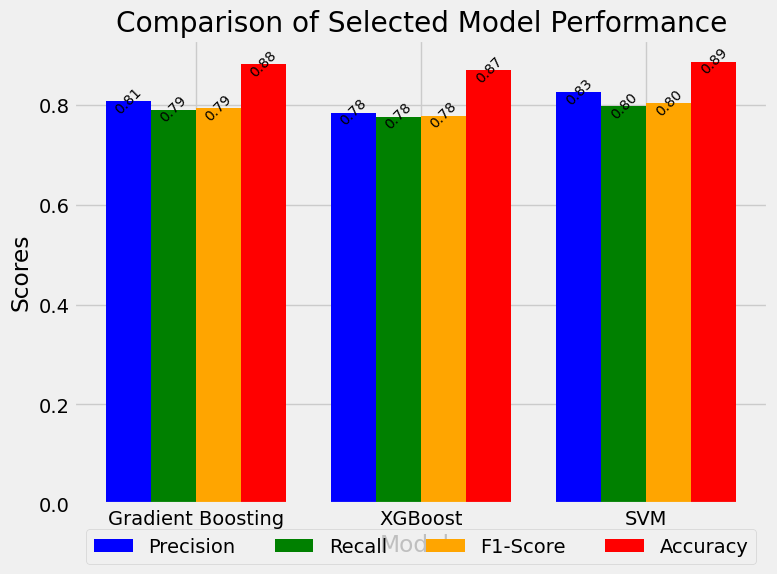

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and filter for XGBoost, SVM, and Gradient Boosting
models = ['Gradient Boosting', 'XGBoost', 'SVM']

# Filtered Precision, Recall, F1-Score, and Accuracy for the selected models
precision = [0.8082, 0.7846, 0.8258]
recall = [0.7908, 0.7768, 0.7981]
f1_score = [0.7943, 0.7784, 0.8036]
accuracy = [0.8815, 0.8696, 0.8870]

# Create subplots for each metric
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each metric
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='blue')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score', color='orange')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Selected Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Position the legend at the bottom center
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Function to attach a slanted text label inside each bar
def autolabel(rects, rotation=45):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height - 0.03,  # Position inside the bar
                f'{height:.2f}', ha='center', va='bottom', 
                rotation=rotation, fontsize=10, color='black')  # Rotate text and color black

# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display the plot
plt.tight_layout()
plt.show()


Interpretation:

Precision:

SVM has the highest precision at 0.83, indicating that it has the lowest false positive rate among the three models.

Recall:

SVM also has the highest recall at 0.80, showing that it is better at identifying true positives compared to the other models.

F1-Score:

SVM again leads with an F1-Score of 0.80, suggesting that it has the best balance between precision and recall.

Accuracy:

SVM achieves the highest accuracy at 0.89, indicating that it has the highest overall correct classification rate.

Conclusion:

Best Model: SVM (Support Vector Machine) is the best-performing model in this comparison, as it consistently scores the highest across all metrics: Precision, Recall, F1-Score, and Accuracy. This indicates that SVM is the most effective model for the task based on the provided data.







# Roc Curve interpretation for svm model

Class Negative (AUC = 0.96):

The negative class has an AUC of 0.96, indicating very high performance in correctly classifying negative instances.
Class Neutral (AUC = 0.97):

The neutral class has an AUC of 0.97, showing excellent model performance in identifying neutral instances.
Class Positive (AUC = 0.99):

The positive class has the highest AUC of 0.99, reflecting near-perfect performance in distinguishing positive instances from the rest.


Overall, the SVM model is highly effective in distinguishing between the different classes based on the ROC curves and AUC scores.

# CONCLUSIONS

1.North Africa : These regions have the lowest average ratings. Kenya Airways should investigate and address the specific issues affecting these areas, focusing on service quality, punctuality, and customer experience.

2.Southeast Asia: With the highest average rating, Kenya Airways should maintain and further enhance services in this region. It can serve as a benchmark for other routes.

3.Class Ratings: The average rating is highest for Business Class, followed by Economy Class, with "Unknown" receiving the lowest average rating.
Customer Satisfaction: This suggests that customers in Business Class tend to be more satisfied compared to those in Economy or with unspecified classes.

4.There substantial dissatisfaction expressed by customers regarding flight delays and cancellations underscores a critical issue that demands immediate and strategic intervention.


# RECOMMEDATIONS

1. To the marketing department,Use positive feedback from high-performing regions like Southeast Asia and Domestic routes in marketing campaigns to highlight Kenya Airways’ commitment to quality service.

2. Improving the experience for Economy and "Unknown" classes could potentially enhance overall customer satisfaction.

3. It is essential to focus on improving the reliability of flight schedules and the efficiency of response mechanisms. Implementing robust measures to reduce delays and cancellations, such as optimizing scheduling, enhancing operational processes, and investing in real-time management systems, will be crucial.

4. Compensation Policies: Review and enhance compensation policies for inconvenienced passengers to rebuild trust and demonstrate commitment to customer satisfaction.